# Disjunctive Normal Networks
## Experiments with synthetic datasets
Datasets:
- Moons
- Circles
- Spirals

In [1]:
!pip install --upgrade disjunctive_nn

Requirement already up-to-date: disjunctive_nn in /home/tsitsimis/.pyenv/versions/3.8.5/envs/neural-decision-trees-env/lib/python3.8/site-packages (0.1.2)


In [2]:
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import torch

from disjunctive_nn import DisjunctiveNormalNetwork

In [3]:
cmap = ListedColormap(["#377eb8", "#ff7f00"])

## Interleaving Half Circles (Moons)

In [4]:
n_samples = 400
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.2)

In [5]:
X, y = noisy_moons

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

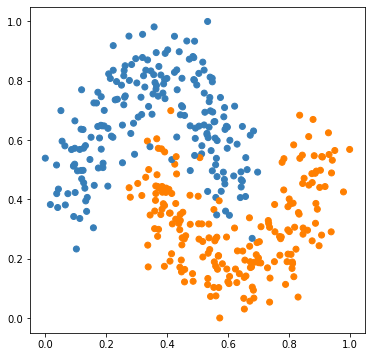

In [6]:
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [8]:
dnn = DisjunctiveNormalNetwork(n_polytopes=2, m=4)

In [10]:
# This cell was run multiple times until accuracy is maximized
dnn.fit(X_train, y_train, epochs=5000, lr=0.01, verbose=True)

Epoch: 0, Accuracy: 0.8958333333333334
Epoch: 500, Accuracy: 0.9416666666666667
Epoch: 1000, Accuracy: 0.9541666666666667
Epoch: 1500, Accuracy: 0.9583333333333334
Epoch: 2000, Accuracy: 0.9708333333333333
Epoch: 2500, Accuracy: 0.9708333333333333
Epoch: 3000, Accuracy: 0.9708333333333333
Epoch: 3500, Accuracy: 0.9708333333333333
Epoch: 4000, Accuracy: 0.975
Epoch: 4500, Accuracy: 0.975


DisjunctiveNormalNetwork(m=4, n_polytopes=2)

In [11]:
print(f"Accuracy: {dnn.score(X_test, y_test)}")

Accuracy: 0.98125


In [12]:
h = 0.01
xx, yy = np.meshgrid(
    np.arange(X[:, 0].min() - 0.1*abs(X[:, 0].min()), X[:, 0].max()*1.1, h),
    np.arange(X[:, 1].min() - 0.1*abs(X[:, 1].min()), X[:, 1].max()*1.1, h))
xy_pairs = np.c_[xx.ravel(), yy.ravel()]

In [13]:
y_pred = dnn.predict_proba(xy_pairs)

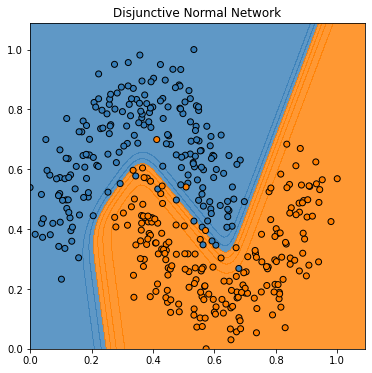

In [14]:
plt.figure(figsize=(6, 6))

plt.contourf(xx, yy, y_pred.reshape(xx.shape), cmap=cmap, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor="k")

plt.title("Disjunctive Normal Network")
plt.show()

#### Individual polytopes
For intuition purposes the 2 polytopes forming the final network output are shown below

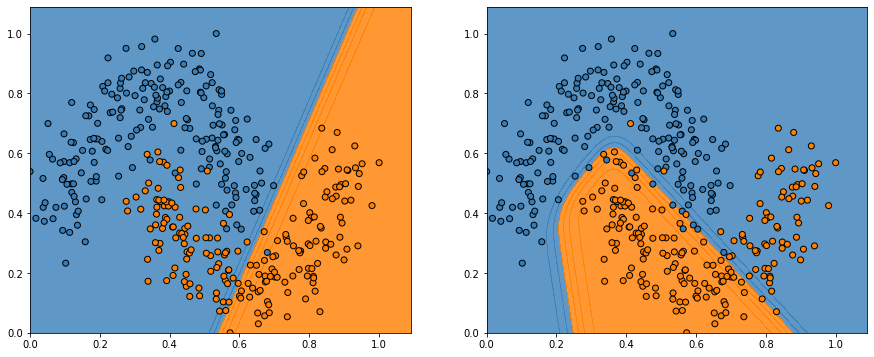

In [15]:
fig, ax = plt.subplots(1, dnn.n_polytopes, figsize=(15, 6))

for i, polytope in enumerate(dnn.polytopes):
    ax[i].contourf(xx, yy, polytope.value(xy_pairs).detach().numpy().reshape(xx.shape), cmap=cmap, alpha=0.8)
    ax[i].scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor="k")

plt.show()

### Comparison with simple Decision Tree

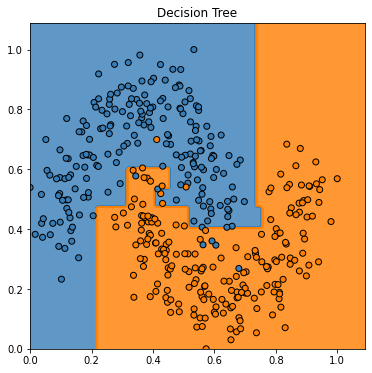

In [21]:
simple_tree = DecisionTreeClassifier()
simple_tree.fit(X_train, y_train)

y_pred_dt = simple_tree.predict_proba(xy_pairs)[:, 1]

plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, y_pred_dt.reshape(xx.shape), cmap=cmap, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor="k")

plt.title("Decision Tree")
plt.show()

In [22]:
simple_tree.get_depth()

8

In [23]:
print(f"Accuracy: {simple_tree.score(X_test, y_test)}")

Accuracy: 0.95625


## Circles

In [24]:
n_samples = 400
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.1)

In [25]:
X, y = noisy_circles

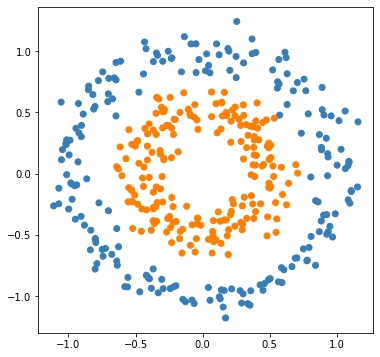

In [26]:
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.show()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [28]:
dnn = DisjunctiveNormalNetwork(n_polytopes=1, m=4)

In [31]:
dnn.fit(X_train, y_train, epochs=1000, lr=0.1)

DisjunctiveNormalNetwork(m=4, n_polytopes=1)

In [32]:
print(f"Accuracy: {dnn.score(X_test, y_test)}")

Accuracy: 0.96875


In [33]:
h = 0.01
xx, yy = np.meshgrid(
    np.arange(X[:, 0].min() - 0.1*abs(X[:, 0].min()), X[:, 0].max()*1.1, h),
    np.arange(X[:, 1].min() - 0.1*abs(X[:, 1].min()), X[:, 1].max()*1.1, h))
xy_pairs = np.c_[xx.ravel(), yy.ravel()]

In [35]:
y_pred = dnn.predict_proba(xy_pairs)

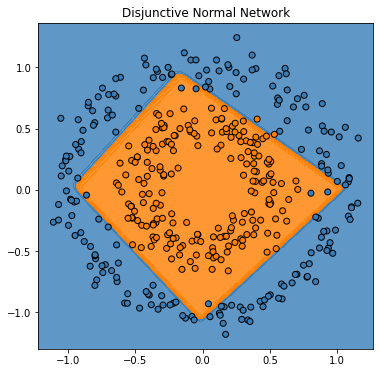

In [36]:
plt.figure(figsize=(6, 6))

plt.contourf(xx, yy, y_pred.reshape(xx.shape), cmap=cmap, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor="k")

plt.title("Disjunctive Normal Network")
plt.show()

### Comparison with simple Decision Tree

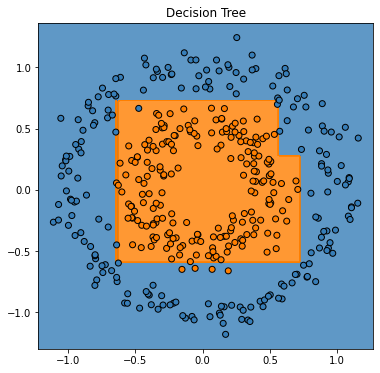

In [37]:
simple_tree = DecisionTreeClassifier()
simple_tree.fit(X_train, y_train)

y_pred_dt = simple_tree.predict_proba(xy_pairs)[:, 1]

plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, y_pred_dt.reshape(xx.shape), cmap=cmap, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor="k")

plt.title("Decision Tree")
plt.show()

In [38]:
simple_tree.get_depth()

6

In [39]:
print(f"Accuracy: {simple_tree.score(X_test, y_test)}")

Accuracy: 0.9625


## Spirals

In [40]:
def spirals(points, noise=0.5):
    n = np.sqrt(np.random.rand(points,1)) * int(360*1.8) * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(points),np.ones(points))))

In [41]:
n_samples = 400
noisy_spirals = spirals(n_samples, noise=1)

In [42]:
X, y = noisy_spirals

In [43]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

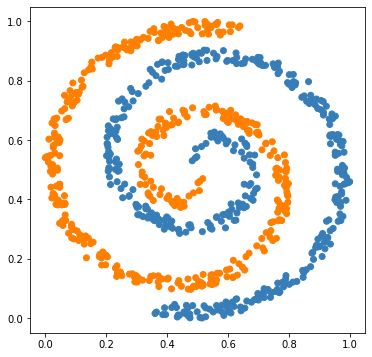

In [44]:
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.show()

In [45]:
dnn = DisjunctiveNormalNetwork(n_polytopes=20, m=10)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [48]:
# This cell was run multiple times until accuracy is maximized
dnn.fit(X_train, y_train, epochs=1000, lr=0.1, verbose=True)

Epoch: 0, Accuracy: 0.9666666666666667
Epoch: 100, Accuracy: 0.9708333333333333
Epoch: 200, Accuracy: 0.9708333333333333
Epoch: 300, Accuracy: 0.9708333333333333
Epoch: 400, Accuracy: 0.9770833333333333
Epoch: 500, Accuracy: 0.98125
Epoch: 600, Accuracy: 0.98125
Epoch: 700, Accuracy: 0.9854166666666667
Epoch: 800, Accuracy: 0.9875
Epoch: 900, Accuracy: 0.99375


DisjunctiveNormalNetwork(m=10, n_polytopes=20)

In [50]:
print(f"Accuracy: {dnn.score(X_test, y_test)}")

Accuracy: 0.990625


In [51]:
h = 0.01
xx, yy = np.meshgrid(
    np.arange(X[:, 0].min() - 0.1*abs(X[:, 0].min()), X[:, 0].max()*1.1, h),
    np.arange(X[:, 1].min() - 0.1*abs(X[:, 1].min()), X[:, 1].max()*1.1, h))
xy_pairs = np.c_[xx.ravel(), yy.ravel()]

In [53]:
y_pred = dnn.predict_proba(xy_pairs)

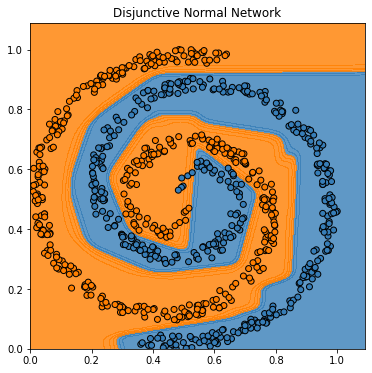

In [54]:
plt.figure(figsize=(6, 6))

plt.contourf(xx, yy, y_pred.reshape(xx.shape), cmap=cmap, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor="k")

plt.title("Disjunctive Normal Network")
plt.show()

### Comparison with simple Decision Tree

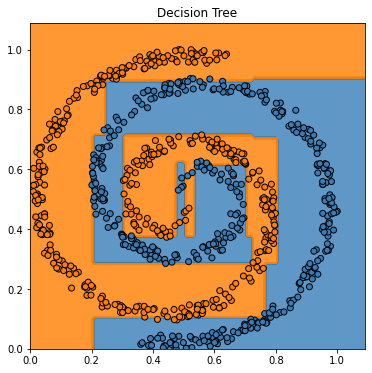

In [55]:
simple_tree = DecisionTreeClassifier()
simple_tree.fit(X_train, y_train)

y_pred_dt = simple_tree.predict_proba(xy_pairs)[:, 1]

plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, y_pred_dt.reshape(xx.shape), cmap=cmap, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor="k")

plt.title("Decision Tree")
plt.show()

In [56]:
simple_tree.get_depth()

15

In [57]:
print(f"Accuracy: {simple_tree.score(X_test, y_test)}")

Accuracy: 0.959375
